## Problem 1 (Naïve Bayes)

![title](10.jpg)

## Problem 2 (k-nearest neighbor) 

### a)

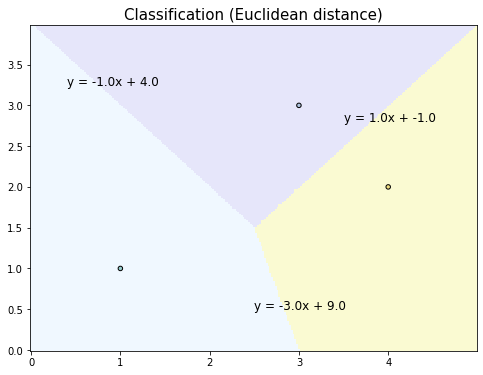

In [12]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from sklearn import datasets
from sklearn.neighbors import NearestCentroid

X = np.array([[1,1],[3,3],[4,2]])
y = np.array([1,2,3])
h = .02 

# we create an instance of Neighbours Classifier and fit the data.
clf = NearestCentroid(metric='euclidean')
clf.fit(X, y)

# The decision boundary. Assign a color to each point in the mesh [x_min, x_max]x[y_min, y_max].
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])

# plot
cmap_light = ListedColormap(['#F0F8FF', '#E6E6FA', '#FAFAD2'])    # Create color maps
cmap_bold = ListedColormap(['#96CDCD', '#B0C4DE', '#EEDD82'])
Z = Z.reshape(xx.shape)     # Put the result into a color plot
plt.figure(figsize = (8,6))
plt.pcolormesh(xx, yy, Z, cmap=cmap_light)
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=cmap_bold, edgecolor='k', s=20)    # Plot also the training points
plt.title("Classification (Euclidean distance)", fontsize=15)
plt.axis('tight')

# line1 (point1/2)
ex = X[:,0]
ey = X[:,1]
a1 = (2*(ex[0]-ex[1]))/(-2*ey[0]+2*ey[1])
b1 = -(ey[0]**2-ey[1]**2+ex[0]**2-ex[1]**2)/(-2*ey[0]+2*ey[1])
plt.text(0.4, 3.25, 'y = {}x + {}'.format(a1,b1), fontsize=12)

# line1 (point1/3)
ex = X[:,0]
ey = X[:,1]
a2 = (2*(ex[0]-ex[2]))/(-2*ey[0]+2*ey[2])
b2 = -(ey[0]**2-ey[2]**2+ex[0]**2-ex[2]**2)/(-2*ey[0]+2*ey[2])
plt.text(2.5, .5, 'y = {}x + {}'.format(a2,b2), fontsize=12)

# line1 (point2/3)
ex = X[:,0]
ey = X[:,1]
a3 = (2*(ex[1]-ex[2]))/(-2*ey[1]+2*ey[2])
b3 = -(ey[1]**2-ey[2]**2+ex[1]**2-ex[2]**2)/(-2*ey[1]+2*ey[2])
plt.text(3.5, 2.8, 'y = {}x + {}'.format(a3,b3), fontsize=12)

plt.show()

### b) 

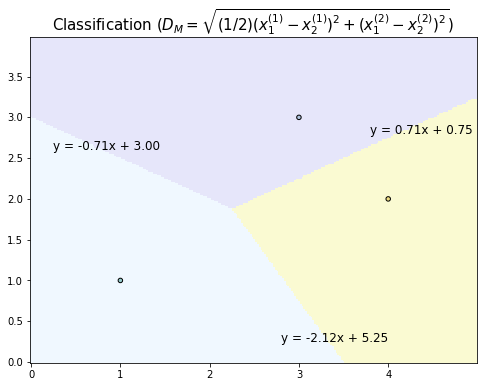

In [16]:

X2=np.zeros([3,2])
X2[:,0] = X[:,0]/((2)**0.5)
X2[:,1] = X[:,1]

# Create an instance of Neighbours Classifier and fit the data.
clf = NearestCentroid()
clf.fit(X2, y)

# The decision boundary. Assign a color to each point in the mesh [x_min, x_max]x[y_min, y_max].
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
Z = clf.predict(np.c_[xx.ravel()/((2)**0.5), yy.ravel()])

# plot
Z = Z.reshape(xx.shape)     # Put the result into a color plot
plt.figure(figsize = (8,6))
plt.pcolormesh(xx, yy, Z, cmap=cmap_light)
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=cmap_bold, edgecolor='k', s=20)    # Plot also the training points
plt.xlim(0,5)
plt.title("Classification ($D_M=\sqrt{(1/2)(x_1^{(1)}-x_2^{(1)})^2+(x_1^{(2)}-x_2^{(2)})^2}$)", fontsize=15)
plt.axis('tight')

# line1 (point1/2)
ex = X2[:,0]
ey = X2[:,1]
a1 = (2*(ex[0]-ex[1]))/(-2*ey[0]+2*ey[1])
b1 = -(ey[0]**2-ey[1]**2+ex[0]**2-ex[1]**2)/(-2*ey[0]+2*ey[1])
plt.text(.25, 2.6, 'y = {:2.2f}x + {:2.2f}'.format(a1,b1), fontsize=12)
# line2 (point1/3)
ex = X2[:,0]
ey = X2[:,1]
a2 = (2*(ex[0]-ex[2]))/(-2*ey[0]+2*ey[2])
b2 = -(ey[0]**2-ey[2]**2+ex[0]**2-ex[2]**2)/(-2*ey[0]+2*ey[2])
plt.text(2.8, .25, 'y = {:2.2f}x + {:2.2f}'.format(a2,b2), fontsize=12)
# line3 (point2/3)
ex = X2[:,0]
ey = X2[:,1]
a3 = (2*(ex[1]-ex[2]))/(-2*ey[1]+2*ey[2])
b3 = -(ey[1]**2-ey[2]**2+ex[1]**2-ex[2]**2)/(-2*ey[1]+2*ey[2])
plt.text(3.8, 2.8, 'y = {:2.2f}x + {:2.2f}'.format(a3,b3), fontsize=12)

plt.show()

## Problem 3 (k-nearest neighbor)

In [17]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report,confusion_matrix

train = np.zeros((1000,784))
test = np.zeros((300,784))
val = np.zeros((300,784))
train_y = np.zeros(1000)
test_y = np.zeros(300)
val_y = np.zeros(300)

f = open("10HW3_train.txt",'r') 
line = f.readlines()
i=0
for L in line:
    string = L.strip("\n").strip("  ").split(" ")
    for j in range(784):
        train[i,j] = int(string[j])
    train_y[i] = int(string[784])
    i += 1
f.close()

f = open("10HW3_test.txt",'r') 
line = f.readlines()
i=0
for L in line:
    string = L.strip("\n").strip("  ").split(" ")
    for j in range(784):
        test[i,j] = int(string[j])
    test_y[i] = int(string[784])
    i += 1
f.close()

f = open("10HW3_validate.txt",'r') 
line = f.readlines()
i=0
for L in line:
    string = L.strip("\n").strip("  ").split(" ")
    for j in range(784):
        val[i,j] = int(string[j])
    val_y[i] = int(string[784])
    i += 1
f.close()

### a) 

In [18]:
k = [1,3, 5, 11, 16, 21]
err_train = np.zeros(6)
err_val = np.zeros(6)
err_test = np.zeros(6)

for i in range(6):
    knn = KNeighborsClassifier(n_neighbors=k[i])
    knn.fit(train,train_y)
    pred_train = knn.predict(train)
    pred_val = knn.predict(val)
    pred_test = knn.predict(test)
    err_train[i] = sum((pred_train-train_y)!=0)/1000
    err_val[i] = sum((pred_val-val_y)!=0)/300
    err_test[i] = sum((pred_test-test_y)!=0)/300
print('k  \t\t\t 1 \t 3 \t 5 \t 11 \t 16 \t 21')
print('training error  \t {:.3f} \t {:.3f} \t {:.3f} \t {:.3f} \t {:.3f} \t {:.3f}'.format(err_train[0], err_train[1], err_train[2], err_train[3], err_train[4], err_train[5]))
print('Validation error\t {:.3f} \t {:.3f} \t {:.3f} \t {:.3f} \t {:.3f} \t {:.3f}'.format(err_val[0], err_val[1], err_val[2], err_val[3], err_val[4], err_val[5]))
print('testing error   \t {:.3f} \t {:.3f} \t {:.3f} \t {:.3f} \t {:.3f} \t {:.3f} \n'.format(err_test[0], err_test[1], err_test[2], err_test[3], err_test[4], err_test[5]))

k  			 1 	 3 	 5 	 11 	 16 	 21
training error  	 0.000 	 0.068 	 0.084 	 0.118 	 0.139 	 0.155
Validation error	 0.127 	 0.143 	 0.130 	 0.173 	 0.197 	 0.203
testing error   	 0.107 	 0.097 	 0.083 	 0.127 	 0.137 	 0.153 



當k=1時，有最好的validation errors，最小，validation error為0.127，此時的testing error則為0.107

### b) 

In [19]:
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(train,train_y)
pred_test = knn.predict(test)
conf = confusion_matrix(test_y,pred_test)
total = np.zeros(10)
for i in range(10):
    total[i] = sum(test_y==i)
print('\t0\t1\t2\t3\t4\t5\t6\t7\t8\t9\n')
for i in range(10):
    print('{}'.format(i), end = '\t')
    for j in range(10):
        print('{:.3f}'.format(conf[i,j]/total[i]), end = '\t')
    print('\n')

	0	1	2	3	4	5	6	7	8	9

0	0.893	0.000	0.000	0.000	0.000	0.000	0.107	0.000	0.000	0.000	

1	0.000	1.000	0.000	0.000	0.000	0.000	0.000	0.000	0.000	0.000	

2	0.000	0.053	0.921	0.000	0.000	0.000	0.000	0.000	0.026	0.000	

3	0.067	0.100	0.033	0.733	0.000	0.000	0.000	0.000	0.033	0.033	

4	0.000	0.000	0.000	0.000	0.929	0.000	0.000	0.000	0.000	0.071	

5	0.000	0.000	0.000	0.077	0.000	0.846	0.000	0.038	0.000	0.038	

6	0.027	0.054	0.000	0.000	0.000	0.000	0.919	0.000	0.000	0.000	

7	0.000	0.000	0.000	0.000	0.000	0.000	0.000	0.933	0.000	0.067	

8	0.000	0.000	0.000	0.036	0.000	0.000	0.036	0.000	0.929	0.000	

9	0.000	0.000	0.037	0.000	0.037	0.000	0.000	0.000	0.000	0.926	



從 confusion matrix中可以觀察到1最容易辨識，辨識準確率高達1，而最難辨識的數字為3，準確度只0.846，且此數字最常被辨識為3

### c) 

Actual : 2
Predicted : 1


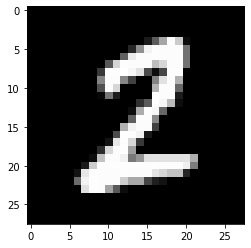

In [35]:
pred = knn.predict(test[[149]])
print('Actual : {}'.format(int(test_y[149])))
print('Predicted : {}'.format(int(pred)))
show = np.reshape(test[[149]], (28,28))
plt.imshow(show, cmap='gray')
plt.show()

上圖的2被分類為1，判斷是因為這個8寫的相對潦草，右邊的筆劃不明顯，因此被判斷成6。